In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
cd ..

C:\Users\penthotal\Desktop\git_repositories


In [27]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit

import pymc3 as pm

from modules.neural_networks import BayesianMLP
from modules.viz_utils import visulize_bernoulli_post, visulize_categorical_post

# Binary - Breast Cancer 

In [32]:
X, y = load_breast_cancer(
    return_X_y=True
)

for tr_i, ts_i in StratifiedShuffleSplit(n_splits=1).split(X, y):
    
    X_tr, X_ts = X[tr_i], X[ts_i]
    y_tr, y_ts = y[tr_i], y[ts_i]
    
    scaler = MinMaxScaler()
    scaler.fit(X_tr)
    X_tr = scaler.transform(X_tr)
    X_ts = scaler.transform(X_ts)

[[-1.99810142e-01 -9.92401648e-01 -1.15053509e+00 -2.42882537e-01
   6.29223173e-01 -6.98544187e-02  2.06090108e+00  6.56537433e-01
   2.47793825e-02 -5.54272744e-01  9.96191051e-01 -2.33657485e+00
  -9.59398435e-01 -2.77937779e+00  3.96551863e-01]
 [ 2.28796536e-01 -4.03764823e-02 -9.88505330e-01 -5.46059619e-01
  -1.50978678e-01 -2.43391733e+00  1.27794493e+00 -1.64674696e+00
  -1.90523049e+00 -3.08796011e-01  2.97881565e-01 -1.88473664e-01
   1.76868726e+00  1.09715935e+00 -1.57272329e+00]
 [-1.05086050e+00 -7.15564088e-01  7.46086549e-01 -9.65454429e-01
  -1.12519011e-02  4.14993248e-01 -1.48210761e+00  4.89972178e-01
  -2.56488719e-01  6.75550495e-01 -3.06960487e-01 -1.34784056e-02
   9.09500830e-01 -1.12692221e+00  3.27430306e-01]
 [ 1.67630038e+00 -4.40024647e-01  1.76360351e+00  1.97059904e-01
  -4.38181926e-01  1.10119930e+00 -4.36539603e-01  4.51742918e-01
  -4.66674231e-01  6.92215412e-01 -8.21106189e-01  3.21029148e-01
   1.67286838e+00 -1.07004153e+00 -3.69038729e-01]
 [-1

[[ 2.14027373 -0.45247018 -1.3187584 ]
 [-1.91050427  0.20568163  0.66247153]
 [-0.72787434  0.82021835 -0.98275816]
 [ 1.22693513 -0.13579345  0.05891261]
 [ 0.94025115  0.35996969 -0.22919225]]
[1.05558805 1.00581481 0.78694938]


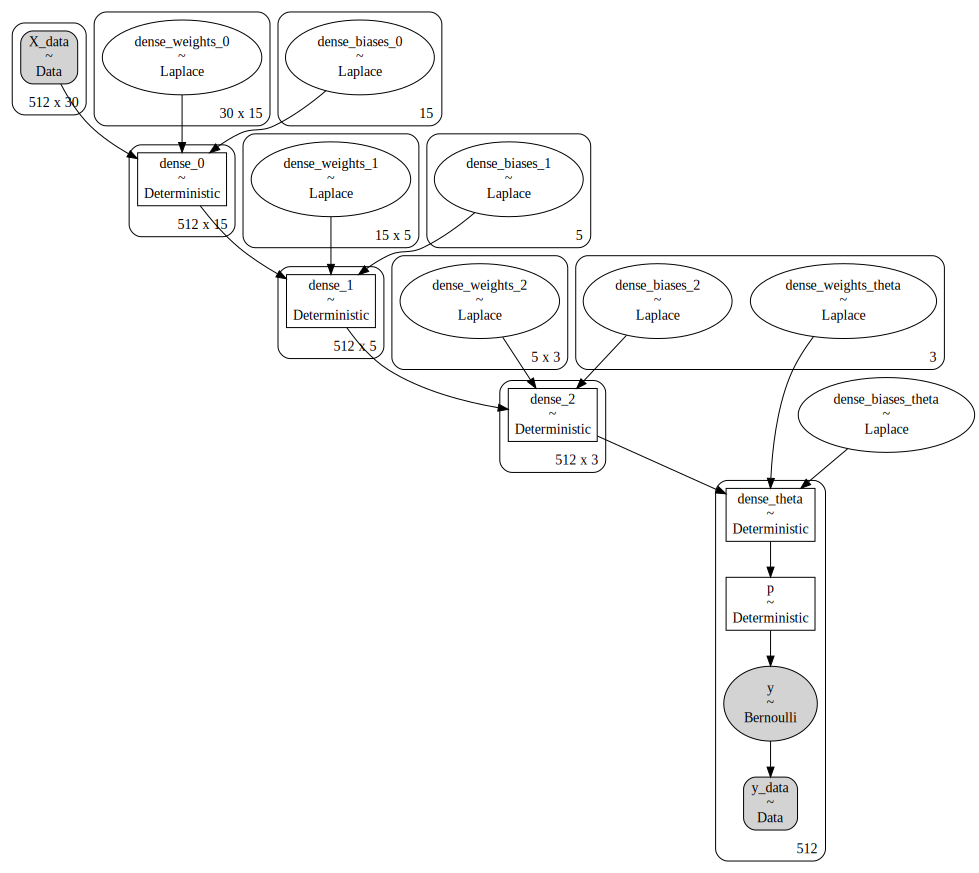

In [38]:
bernoulli_perceptron = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='bernoulli_lk',
    prior=pm.Laplace,
    layers=(15, 5, 3), 
    activation='tanh',
    mu=0.,
    b=.1,
    advi_approx=False
)
bernoulli_perceptron.show_graph()

In [35]:
bernoulli_perceptron.fit()
bernoulli_traces = bernoulli_perceptron.predict(
    X_ts, 
    y_ts, 
    ['p'], 
    samples=3000
)

MissingInputError: Input 0 of the graph (indices start from 0), used to compute InplaceDimShuffle{x,0}(dense_biases_2), was not provided and not given a value. Use the Theano flag exception_verbosity='high', for more information on this error.

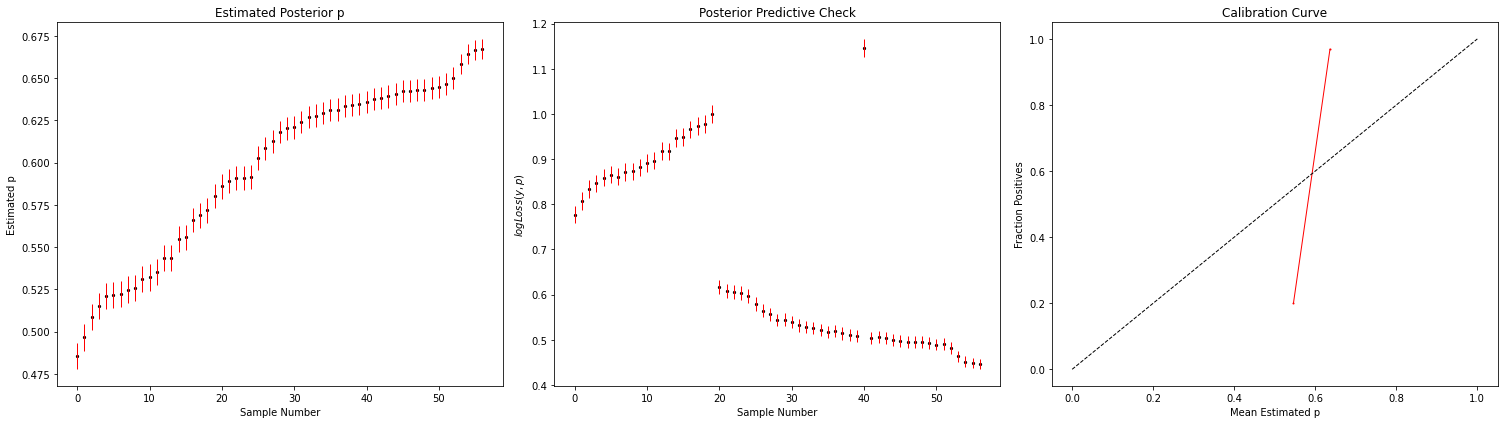

In [23]:
visulize_bernoulli_post(
    traces=bernoulli_traces, 
    y=y_ts
)

# Multiclass - MNIST

In [10]:
X, y = load_digits(return_X_y=True)

for tr_i, ts_i in StratifiedShuffleSplit(n_splits=1).split(X, y):
    
    X_tr, X_ts = X[tr_i], X[ts_i]
    y_tr, y_ts = y[tr_i], y[ts_i]

    scaler = MinMaxScaler()
    scaler.fit(X_tr)

    X_tr = scaler.transform(X_tr)
    X_ts = scaler.transform(X_ts)

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


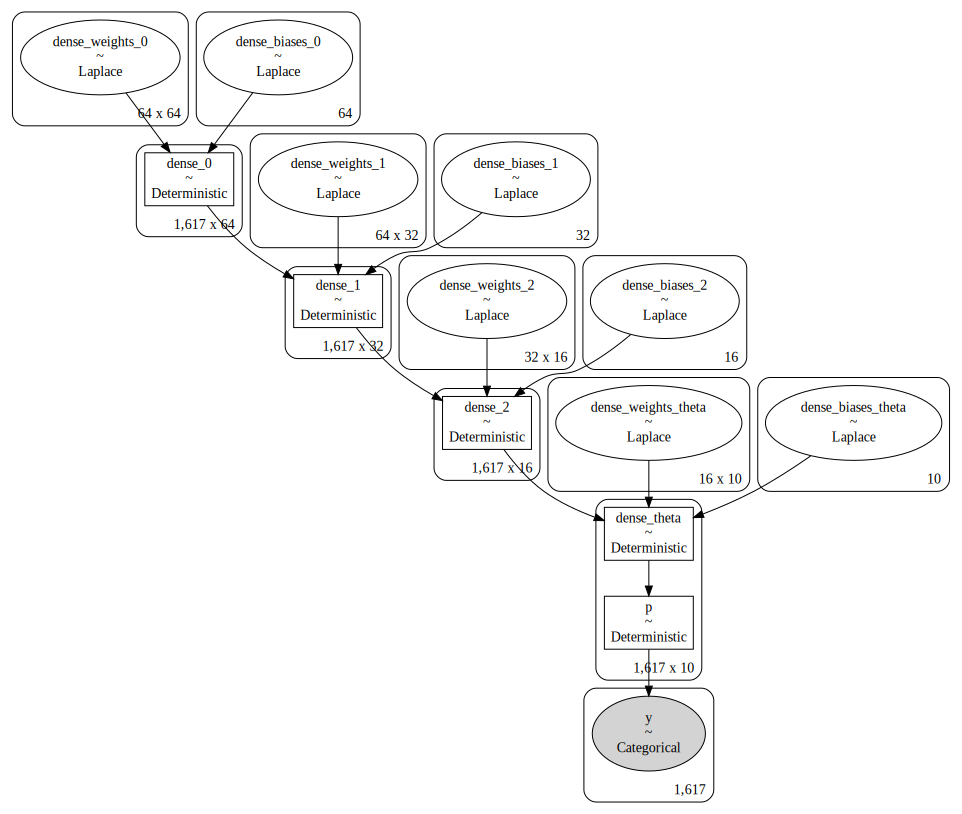

In [11]:
categorical_perceptron = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=10, 
    likelyhood_model='categorical_lk',
    layers=(64, 32, 16), 
    activation='tanh',
    prior=pm.Laplace,
    mu=0.,
    b=1.,
    batch_size=64
)
categorical_perceptron.show_graph()

In [12]:
categorical_perceptron.fit(n=100000)
categorical_traces = categorical_perceptron.predict(
    X_ts, 
    y_ts,
    ['p'],
    samples=3000
)

Finished [100%]: Average Loss = 128.92


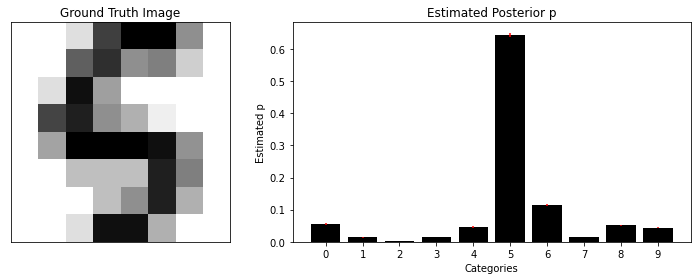

In [13]:
visulize_categorical_post(
    X=X_ts, 
    p=categorical_traces['p'],
    index=83
)